# Machine Learning Final Exam, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures and labs.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Download the [CSV dataset](http://www.cs.ait.ac.th/~mdailey/class/ml/final-exam-data.csv) for the exam.
Note that the data are two dimensional with labels '0' and '1'. Provide a scatter plot for the data with
the two classes shown in different colors.

In [123]:
# Place code to load the data and plot the scatterplot here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


# Import the data

df = pd.read_csv('final-exam-data.csv')
df.head()

,# x1,x2,y
0,3.974170,3.138378,0.0
1,6.037439,7.155408,1.0
2,3.619643,2.524895,1.0
3,3.366346,3.106862,0.0
4,3.743221,9.250866,1.0


## Question 2 (30 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Using the logistic regression code we developed in lab, fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [109]:
df.columns

Index(['# x1', 'x2', 'y'], dtype='object')

In [110]:
feature_col_idx = df.columns.get_indexer(['# x1', 'x2'])
#feature_col_idx


target_col_idx = df.columns.get_indexer(['y'])
#target_col_idx


# Setting the X and y
X = df.iloc[:,feature_col_idx].to_numpy()
y = df.iloc[:,target_col_idx].to_numpy()
m,n = X.shape
y = y.reshape(m,1)

print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (400, 2)
y.shape (400, 1)


In [111]:
#Standardize
XX = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)

In [112]:
import random
random.seed(12)

percent_train = .8

# Partion data into training and test datasets
m, n = X.shape

y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:]
X_test = XX[test_idx,:]

y_train = y[train_idx]
y_test = y[test_idx]

In [113]:
#Augment
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

In [114]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0] 
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad #grad_j use y-h not h-y so addition
        j_history.append(cost)
    return theta, j_history

def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [119]:
m,n = X_train.shape

# Declare alpha
alpha = .01

# Initialize theta
theta_initial = np.zeros((n, 1))                       

# Number of iterations
num_iters = 100000

theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[3.34287641]
 [2.81086845]
 [3.04174562]]
Cost with optimized theta: 0.2120027667583762


In [121]:
#Indicate the training set accuracy and validation set accuracy of the logistic regression model.

y_train_pred_soft = h(X_train, theta)
#y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)
y_train_pred_hard = [1. if y > 0.5 else 0. for y in y_train_pred_soft]
train_acc = (y_train_pred_hard == y_train).astype(int).sum() / y_train.shape[0]
print("Train accuracy:", train_acc)

y_test_pred_soft = h(X_test, theta)
#y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)
y_test_pred_hard = [1. if y > 0.5 else 0. for y in y_test_pred_soft]
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]
print("Test accuracy:", test_acc)

Train accuracy: 43.6
Teat accuracy: 42.7


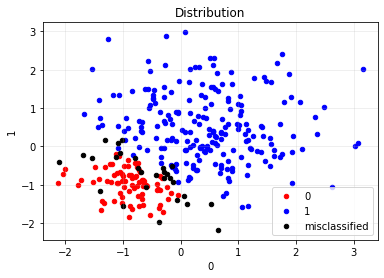

In [237]:
y_train_pred_hard = np.array(y_train_pred_hard)

idx_01 = np.where(y_train_pred_hard == 0.0)
idx_02 = np.where(y_train[:,0] == 0.0)
idx_0 = np.intersect1d(idx_01, idx_02)

idx_11 = np.where(y_train_pred_hard == 1.0)
idx_12 = np.where(y_train[:,0] == 1.0)
idx_1 = np.intersect1d(idx_11, idx_12)

idx2 = np.where(y_train_pred_hard != y_train[:,0])

ax = plt.axes()
plt.title('Distribution')
plt.xlabel('0')
plt.ylabel('1')
plt.grid(axis='both', alpha=.25)
ax.scatter(X_train[idx_0,:][:,1], X_train[idx_0,:][:,2], s=20, c='r', label='0')
ax.scatter(X_train[idx_1,:][:,1], X_train[idx_1,:][:,2], s=20, c='b', label='1')
ax.scatter(X_train[idx2[0],:][:,1], X_train[idx2[0],:][:,2], s=20, c='black', label='misclassified')
plt.legend()
plt.show()


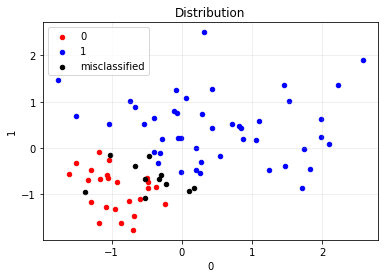

In [242]:
y_test_pred_hard = np.array(y_test_pred_hard)

idx_01 = np.where(y_test_pred_hard == 0.0)
idx_02 = np.where(y_test[:,0] == 0.0)
idx_0 = np.intersect1d(idx_01, idx_02)

idx_11 = np.where(y_test_pred_hard == 1.0)
idx_12 = np.where(y_test[:,0] == 1.0)
idx_1 = np.intersect1d(idx_11, idx_12)

idx2 = np.where(y_test_pred_hard != y_test[:,0])

ax = plt.axes()
plt.title('Distribution')
plt.xlabel('0')
plt.ylabel('1')
plt.grid(axis='both', alpha=.25)
ax.scatter(X_test[idx_0,:][:,1], X_test[idx_0,:][:,2], s=20, c='r', label='0')
ax.scatter(X_test[idx_1,:][:,1], X_test[idx_1,:][:,2], s=20, c='b', label='1')
ax.scatter(X_test[idx2[0],:][:,1], X_test[idx2[0],:][:,2], s=20, c='black', label='misclassified')
plt.legend()
plt.show()

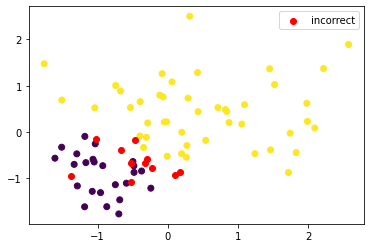

In [255]:
matched_test = np.where(y_test_pred_hard == y_test[:,0])
unmatched_test = np.where(y_test_pred_hard != y_test[:,0])
X_test_matched = X_test[matched_test[0],:]
y_test_matched = y_test[matched_test[0]]
X_test_unmatched = X_test[unmatched_test[0],:]
y_test_unmatched = y_test[unmatched_test[0]]

plt.scatter(X_test_matched[:,1], X_test_matched[:,2], c=y_test_matched)
plt.scatter(X_test_unmatched[:,1], X_test_unmatched[:,2], c='r', label='incorrect')
plt.legend()
plt.show()

## Question 3 (20 points)

Repeat Question 2 using the PyTorch neural network library. Your PyTorch model should have a single linear layer with two inputs and a single output, a logistic sigmoid activation function, binary cross entropy loss function, and stochastic gradient descent for the optimizer. Show the same plots you showed for Question 2.

In [340]:
feature_col_idx = df.columns.get_indexer(['# x1', 'x2'])
#feature_col_idx


target_col_idx = df.columns.get_indexer(['y'])
#target_col_idx


# Setting the X and y
X = df.iloc[:,feature_col_idx].to_numpy()
y = df.iloc[:,target_col_idx].to_numpy()
m,n = X.shape
y = y.reshape(m,1)

print("X.shape", X.shape)
print("y.shape", y.shape)

XX = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)

import random
random.seed(12)

percent_train = .8

# Partion data into training and test datasets
m, n = X.shape

y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:]
X_test = XX[test_idx,:]

y_train = y[train_idx]
y_test = y[test_idx]

X.shape (400, 2)
y.shape (400, 1)


In [341]:
#X_train

In [342]:
# Place code to build, train, and evaluate your PyTorch model here
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [343]:
output_size = 1

class LogisticRegressTorch(nn.Module):
    
    def __init__(self, n_features=2):
        super().__init__()
        self.l1 = nn.Linear(n_features, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x =  self.sigmoid(x)
        return x

In [344]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

In [345]:
#Create the model object
torch.manual_seed(999)
model = LogisticRegressTorch(n_features=2)

# Define the loss function - Binary Cross Entropy
criterion = nn.BCELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [346]:
epochs = 1000
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    #for b, (X_train, y_train) in enumerate(train_loader):
        
    # Apply the model
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Tally the number of correct predictions
    predictions = [1. if x > 0.5 else 0. for x in y_pred.data.numpy()]
    y_train_np = y_train.numpy().reshape(1,-1)
    trn_corr = (predictions == y_train_np).sum()
    #trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        #for b, (X_test, y_test) in enumerate(test_loader):

        # Apply the model
        y_val = model(X_test)

        # Tally the number of correct predictions
        predictions = [1. if x > 0.5 else 0. for x in y_val.data.numpy()]
        y_test_np = y_test.numpy().reshape(1,-1)
        tst_corr = (predictions == y_test_np).sum()

    val_loss = criterion(y_val, y_test)
    test_losses.append(val_loss)
    test_correct.append(tst_corr)

In [347]:
print(train_correct[-1]/len(y_train))
print(test_correct[-1]/len(y_test))

0.934375
0.925


In [348]:
y_pred_train = model(X_train)
y_pred_train = [1. if x > 0.5 else 0. for x in y_pred_train.data.numpy()]

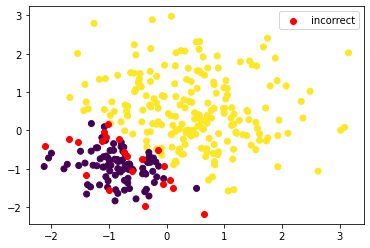

In [349]:
matched_train = np.where(y_pred_train == y_train.data.numpy()[:,0])
unmatched_train = np.where(y_pred_train != y_train.data.numpy()[:,0])
X_train_matched = X_train.data.numpy()[matched_train[0],:]
y_train_matched = y_train.data.numpy()[matched_train[0]]
X_train_unmatched = X_train.data.numpy()[unmatched_train[0],:]
y_train_unmatched = y_train.data.numpy()[unmatched_train[0]]

plt.scatter(X_train_matched[:,0], X_train_matched[:,1], c=y_train_matched)
plt.scatter(X_train_unmatched[:,0], X_train_unmatched[:,1], c='r', label='incorrect')
plt.legend()
plt.show()

In [350]:
y_pred_test = model(X_test)
y_pred_test = [1. if x > 0.5 else 0. for x in y_pred_test.data.numpy()]

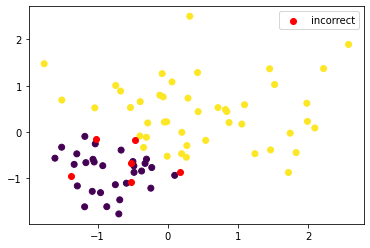

In [351]:
matched_test = np.where(y_pred_test == y_test.data.numpy()[:,0])
unmatched_test = np.where(y_pred_test != y_test.data.numpy()[:,0])
X_test_matched = X_test.data.numpy()[matched_test[0],:]
y_test_matched = y_test.data.numpy()[matched_test[0]]
X_test_unmatched = X_test.data.numpy()[unmatched_test[0],:]
y_test_unmatched = y_test.data.numpy()[unmatched_test[0]]

plt.scatter(X_test_matched[:,0], X_test_matched[:,1], c=y_test_matched)
plt.scatter(X_test_unmatched[:,0], X_test_unmatched[:,1], c='r', label='incorrect')
plt.legend()
plt.show()

## Question 4 (20 points)

Add a 10-unit hidden layer with ReLU activation to the PyTorch model from Question 3. Plot training loss and validation loss as function of epoch of training. Do you see any evidence of overfitting?

In [380]:
output_size = 1
hidden1_size = 10

class LogisticRegressTorch_2(nn.Module):
    
    def __init__(self, n_features=2):
        super().__init__()        
        self.l1 = nn.Linear(n_features, hidden1_size)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden1_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x =  self.sigmoid(x)
        return x

In [381]:
#Create the model object
torch.manual_seed(999)
model = LogisticRegressTorch_2(n_features=2)

# Define the loss function - Binary Cross Entropy
criterion = nn.BCELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [382]:
epochs = 10000
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    #for b, (X_train, y_train) in enumerate(train_loader):
        
    # Apply the model
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Tally the number of correct predictions
    predictions = [1. if x > 0.5 else 0. for x in y_pred.data.numpy()]
    y_train_np = y_train.numpy().reshape(1,-1)
    trn_corr = (predictions == y_train_np).sum()
    #trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        #for b, (X_test, y_test) in enumerate(test_loader):

        # Apply the model
        y_val = model(X_test)

        # Tally the number of correct predictions
        predictions = [1. if x > 0.5 else 0. for x in y_val.data.numpy()]
        y_test_np = y_test.numpy().reshape(1,-1)
        tst_corr = (predictions == y_test_np).sum()

    val_loss = criterion(y_val, y_test)
    test_losses.append(val_loss)
    test_correct.append(tst_corr)

In [383]:
train_loss = [loss.item() for loss in train_losses]
test_loss = [loss.item() for loss in test_losses]

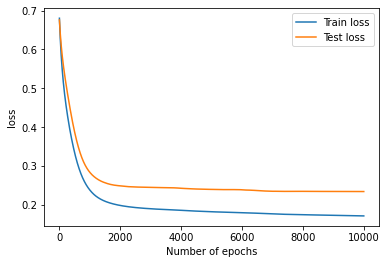

In [384]:
# Plot training loss
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

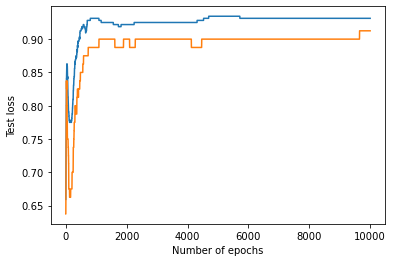

In [385]:
train_correct = [x/len(y_train) for x in train_correct]
test_correct = [x/len(y_test) for x in test_correct]
plt.plot(train_correct, label='Train Acc')
plt.plot(test_correct, label='Test Acc')
plt.xlabel('Number of epochs')
plt.ylabel('Test loss')
plt.show()

*Discuss whether you observe overfitting here.*

## Question 5 (10 points)

In fact, the data from Question 1 were generated from a Gaussian mixture model. If you were given the data without the labels, for unsupervised learning, do you think the EM algorithm for Gaussian mixtures with $k=2$ components would recover the two classes? Why or why not?

*Discuss here.*

## Question 6 (10 points)

Consider the following problem: Students taking classes in Room TC 103 often feel the room is too cold or too hot. To solve the problem, we connect three air conditioners' on/off switches to a computer, place a temperature sensor outdoors next to the room, and put a button box on each student's desk with 3 buttons, labeled "I'm freezing," "I'm sweating", and "I feel good." Students can press any of the three buttons to indicate their comfort level. Every 10 minutes, the outdoor temperature is measured in degrees Celsius, and the current comfort level of each student (1, 2, or 3) is measured. The system gets the measurements as input and then has to set the control for each of the three air conditioners to high, low, or off for the next 10 minutes.

Suppose you would like to build a reinforcement learning agent to optmize the air conditioning control for the room. Do the following:

1. Briefly explain the state space, action space, reward function, and discount factor you think should be used for this problem.
2. Briefly explain the reason it is difficult to know the transition probabilities for this problem.
3. Briefly describe how you could use a neural network to learn the state transition probabilities.

*Write your explanations here.*

State space 
- Aircon 1 - high, Aircon 2 - high, Aircon 3 - high
- Aircon 1 - high, Aircon 2 - high, Aircon 3 - low
- Aircon 1 - high, Aircon 2 - high, Aircon 3 - off

- Aircon 1 - high, Aircon 2 - low, Aircon 3 - high
- Aircon 1 - high, Aircon 2 - off, Aircon 3 - high
- Aircon 1 - high, Aircon 2 - high, Aircon 3 - high

Action space
- ST 1 press 1
- ST 1 press 2
- ST 1 press 3
- ...
- ST n press 1
- ST n press 2
- ST n press 3

Reward
- at `t` if we are in same state as t-1 --> reward 100
- at t if we are in a state where only one aircon setting is changed, compared to state at t-1 --> reward 67
- at t if we are in a state where two aircon setting is changed, compared to state at t-1 --> reward 33
- at t if we are in a state where all aircon setting is changed, compared to state at t-1 --> reward 0


The number of possible states and the number of possible actions are large
Thus developing the Psa table is difficult

A DQN is trained to output  𝑄(𝑠,𝑎)  values for each action given the input state  𝑠 . In operation, in state  𝑠 , the action  𝑎  is chosen greedily based on  𝑄(𝑠,𝑎)  or stochastically following an epsilon-greedy policy.